In [8]:
from envSetup import load_tag_pos
from AprilLib import TagDetect
import cv2
import numpy as np

# img_index = 209

intrinsic = np.array(([207.9138,0,315.9991],[0,206.5876,242.7096],[0,0,1]),dtype=np.double)

distortion = np.array([0.2345,-0.1114,0,0],dtype=np.double)

tag_poses, centers, screens = load_tag_pos()
tg = TagDetect(tag_poses, intrinsic, distortion)

In [4]:
Classes = ['bailianhua',
 'chuju',
 'hehua',
 'juhua',
 'lamei',
 'lanhua',
 'meiguihua',
 'shuixianhua',
 'taohua',
 'yinghua',
 'yuanweihua',
 'zijinghua']

In [7]:
import os
import shutil
for c in Classes:
    for root, dirs, files in os.walk(f"../data/train_data_raw/{c}"):
        i = 0
        for file in files:
            shutil.copy2(f"../data/train_data_raw/{c}/{file}", f"./data/train/{c}/{i}.jpg")
            i+=1
    

In [9]:
import cv2
def preprocess_image(filePath: str):
    img = cv2.imread(filePath)
    res = tg.detect(img)
    for tag in res:
        if tag.tag_id == 32:
            _, rvec, tvec = cv2.solvePnP(tg.tagStandard[str(tag.tag_id)], tag.corners, tg.intrinsic, tg.distortion)
            R, _ = cv2.Rodrigues(rvec)
            point2d, _ = cv2.projectPoints(screens[tag.tag_id], R, tvec, intrinsic, distortion)
            pts1 = point2d.astype(np.float32)
            pts2 = np.array([[0, 0], [27, 0], [27, 27], [0, 27]], dtype=np.float32)
            M = cv2.getPerspectiveTransform(pts1, pts2)
            result = cv2.warpPerspective(img, M, (28, 28))
            cv2.imwrite(filePath, result)
        else:
            continue

In [10]:
for root, dirs, files in os.walk("./data/train/"):
    for file in files:
        file_path = os.path.join(root, file)
        preprocess_image(file_path)

In [3]:

import os
import cv2
for root, dirs, files in os.walk("./data/train/bailianhua/"):
    l = []
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        l.append(img)

In [11]:
import numpy as np
s = np.mean(l, axis=0).astype(int)

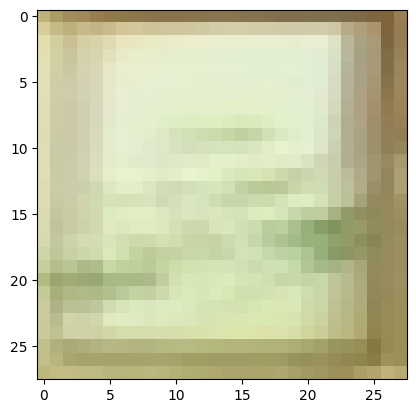

In [12]:
import matplotlib.pyplot as plt
plt.imshow(s)
plt.show()